In [5]:
import pandas as pd

In [6]:
import numpy as np

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [11]:
import matplotlib.pyplot as plt

In [12]:
import seaborn as sns

In [15]:
dados = pd.read_csv("Dataset.csv")

In [16]:
print(dados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Idade                190 non-null    float64
 1   Renda Anual (em $)   189 non-null    float64
 2   Gênero               193 non-null    object 
 3   Tempo no Site (min)  200 non-null    float64
 4   Anúncio Clicado      190 non-null    object 
 5   Compra (0 ou 1)      200 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 9.5+ KB
None


In [18]:
print(dados.describe())

            Idade  Renda Anual (em $)  Tempo no Site (min)  Compra (0 ou 1)
count  190.000000          189.000000           200.000000       200.000000
mean    38.510526        58253.968254            17.349090         0.330000
std     12.679918        25612.061811             7.724088         0.471393
min     18.000000        30000.000000            -1.000000         0.000000
25%     28.000000        30000.000000            10.860240         0.000000
50%     38.000000        50000.000000            18.197552         0.000000
75%     50.000000        70000.000000            23.887341         1.000000
max     59.000000       100000.000000            29.853484         1.000000


In [22]:
dados['Gênero'] = LabelEncoder().fit_transform(dados['Gênero'])

In [23]:
dados['Anúncio Clicado'] = dados['Anúncio Clicado'].apply(lambda x: 1 if x == 'Sim' else 0)

In [50]:
dados.columns = dados.columns.str.strip()

In [51]:
dados.columns = dados.columns.str.replace(' ', '_')

In [52]:
X = dados[['Idade', 'Renda_Anual_(em_$)', 'Gênero', 'Tempo_no_Site_(min)', 'Anúncio_Clicado']]

In [57]:
y = dados['Compra_(0_ou_1)']

In [58]:
scaler = StandardScaler()

In [64]:
X[['Idade', 'Renda Anual (em $)', 'Tempo no Site (min)']] = scaler.fit_transform(X[['Idade', 'Renda_Anual_(em_$)', 'Tempo_no_Site_(min)']])

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
modelo = RandomForestClassifier(random_state=42)

In [69]:
modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [70]:
y_pred = modelo.predict(X_test)

In [71]:
print("Acurácia:", accuracy_score(y_test, y_pred))

Acurácia: 0.5833333333333334


In [76]:
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.59      0.91      0.72        35
           1       0.50      0.12      0.19        25

    accuracy                           0.58        60
   macro avg       0.55      0.52      0.46        60
weighted avg       0.55      0.58      0.50        60



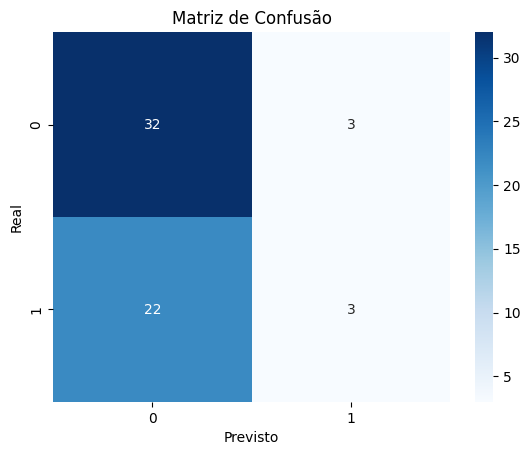

In [77]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

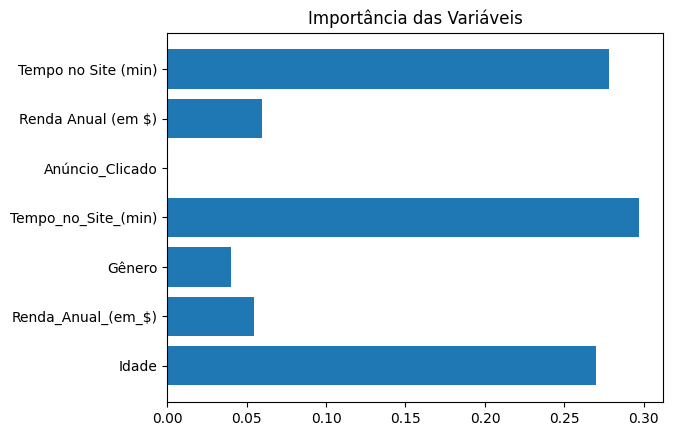

In [75]:
importancias = modelo.feature_importances_
plt.barh(X.columns, importancias)
plt.title('Importância das Variáveis')
plt.show()